In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split # split data into training and test sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring 
from sklearn.model_selection import GridSearchCV # cross validation 
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix  


In [ ]:
df = pd.read_csv('D:\Shubhi\DataScience\Data Sets\Telco-Customer-Churn.csv')

In [ ]:
df.head()

In [ ]:
 df.info()

In [ ]:
df['Churn'].unique() # Checked every column to check the unique values to make sure that column doesn't have blank spaces. 

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) # This error tells that we have some blank value which cannot be parsed to numeric value

In [ ]:
df.loc[df['TotalCharges'] == ' '] # To find how many rows have blank value for Total Charges
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = 0 # Setting blank value to '0' for xgboost
df.loc[df['tenure'] == 0]

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.replace(' ', '_', regex=True, inplace=True) # To remove blank spaces in whole dataframe

In [ ]:
df.dtypes

In [ ]:
X = df.drop(['Churn','customerID'], axis=1).copy() 

In [ ]:
X.head()

In [ ]:
y = df['Churn'].copy()
y.head()

In [ ]:
 X.dtypes

In [ ]:
# One hot encoding
pd.get_dummies(X, columns=['PaymentMethod']).head()

In [ ]:
X_encoded = pd.get_dummies(X, columns=['gender','SeniorCitizen','Partner','Dependents',
                                     'PhoneService',
                                     'MultipleLines',
                                     'InternetService',
                                     'OnlineSecurity',
                                     'OnlineBackup',
                                     'DeviceProtection',
                                     'TechSupport',
                                     'StreamingTV',
                                     'StreamingMovies',
                                     'Contract',
                                     'PaperlessBilling',
                                     'PaymentMethod'])
X_encoded.head()

In [ ]:
y.unique() # TO check whether y contains expected values or any other values

In [ ]:
# check how data is imbalanced by divinding the numer of people who left the company,
# where y = 1, by total numner of people in the dataset

# sum(y == 'Yes')/len(y)

print (f'total no of Yes : ', {sum(y == 'Yes')})
print (f'total no of No : ', {sum(y == 'No')})



In [ ]:
# Converted Yes and No to 0's and 1's
y.replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
sum(y)/len(y)

In [ ]:
# Since only 27% people left the company, we will split the data using 
# stratification in order to maintain the same percentage in both training and
# testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)


In [ ]:
sum(y_train)/len(y_train)

In [ ]:
sum(y_test)/len(y_test)

In [117]:
X_test.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No_phone_service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber_optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [118]:
# Building a Preliminary XGBoost Model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test )])


[0]	validation_0-aucpr:0.63160


C:\Users\Ridaan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ridaan\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


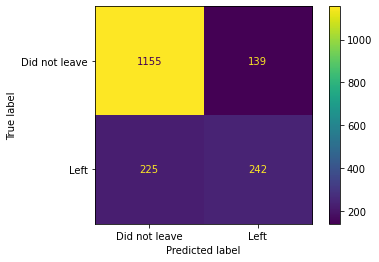

In [119]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d',
                     display_labels=["Did not leave", "Left"])

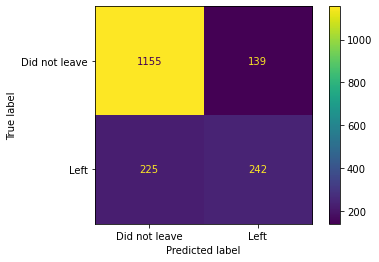

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Did not leave", "Left"])
disp.plot()
plt.show()


In the confusion matrix, we see that of out of 1294 ( people who do not leave ), 1155 people i.e. 89% are correctly classified.  But out of 467 people who leave the company, only 242 i.e. only 52% are correctly classified. 
That mean XGBoost Tree did not do a good job as we need to correctly classify the people who are leaving the company so as to retain the company cost. 
So, now we will optimize the XGBoost through, scale_pos_weight that helps with the imbalanced data.

In [131]:
# ROUND 1
# param_grid = {
#     'max_depth': [3,4,5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma' : [0, 0.25, 1.0],
#     'reg_lamda' : [0, 1.0, 10.0],
#     'scale_pos_weight' : [1,3,5]
# }

# Output : {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lamda': 0, 'scale_pos_weight': 1}

# ROUND 2
param_grid = {
    'max_depth': [5,6,7],
    'learning_rate': [0.1, 0.5, 1],
    'gamma' : [1, 5, 10],
    'reg_lamda' : [0],
    'scale_pos_weight' : [1, 0.5, 0.1]
}

# Output: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lamda': 0, 'scale_pos_weight': 0.5}
    
## NOTE: To speed up cross validation and to prevent from overfitting, we are 
## only using a random subset of the data (90%) and are only using a random 
## subset of the features (columns) (50%) per tree.
    
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic',
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5),
    param_grid = param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3  
)
    
optimal_params.fit(X_train, 
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose = False)
    
print(optimal_params.best_params_)

C:\Users\Ridaan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ridaan\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[05:18:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "reg_lamda" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lamda': 0, 'scale_pos_weight': 0.5}


In [132]:
# Building XGBoost Model using above parameters

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42,
                           gamma=1,
                           learn_rate=0.1,
                            max_depth=5,
                            reg_lambda=0,
                            scale_pos_weight=0.5,
                            sub_sample=0.9,
                            colsample_bytree=0.5
                           )
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test )])

[05:43:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "learn_rate", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.64569
[1]	validation_0-aucpr:0.64978
[2]	validation_0-aucpr:0.65669
[3]	validation_0-aucpr:0.66040
[4]	validation_0-aucpr:0.65964
[5]	validation_0-aucpr:0.66004
[6]	validation_0-aucpr:0.65904
[7]	validation_0-aucpr:0.65742
[8]	validation_0-aucpr:0.65511
[9]	validation_0-aucpr:0.65409
[10]	validation_0-aucpr:0.65460
[11]	validation_0-aucpr:0.65127
[12]	validation_0-aucpr:0.65007
[13]	validation_0-aucpr:0.64368


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=0.5,
              seed=42, sub_sample=0.9, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


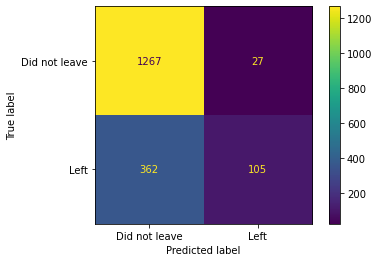

In [133]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d',
                     display_labels=["Did not leave", "Left"]) 